#### SMA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.DataFrame({
    "Week":pd.date_range(start = "2023-08", periods = 8, freq = 'W'),
    "sales":[39,44,40,45,38,43,39,np.nan],
    "3MA":[0]*8})

In [5]:
df

,Week,sales,3MA
0,2023-08-06,39.0,0
1,2023-08-13,44.0,0
2,2023-08-20,40.0,0
3,2023-08-27,45.0,0
4,2023-09-03,38.0,0
5,2023-09-10,43.0,0
6,2023-09-17,39.0,0
7,2023-09-24,NaN,0


In [7]:
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)
df

,Week,sales,3MA
0,2023-08-06,39.0,NaN
1,2023-08-13,44.0,NaN
2,2023-08-20,40.0,NaN
3,2023-08-27,45.0,41.0
4,2023-09-03,38.0,43.0
5,2023-09-10,43.0,41.0
6,2023-09-17,39.0,42.0
7,2023-09-24,NaN,40.0


<Axes: xlabel='Date'>

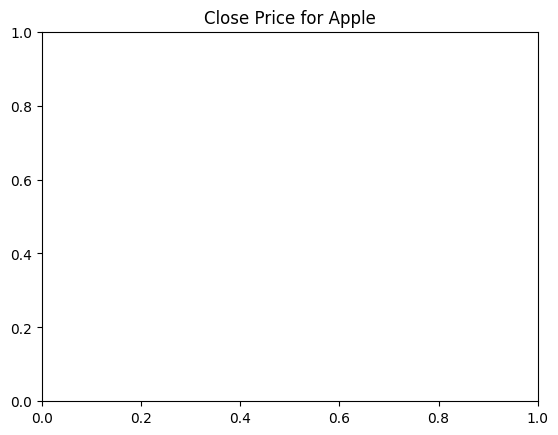

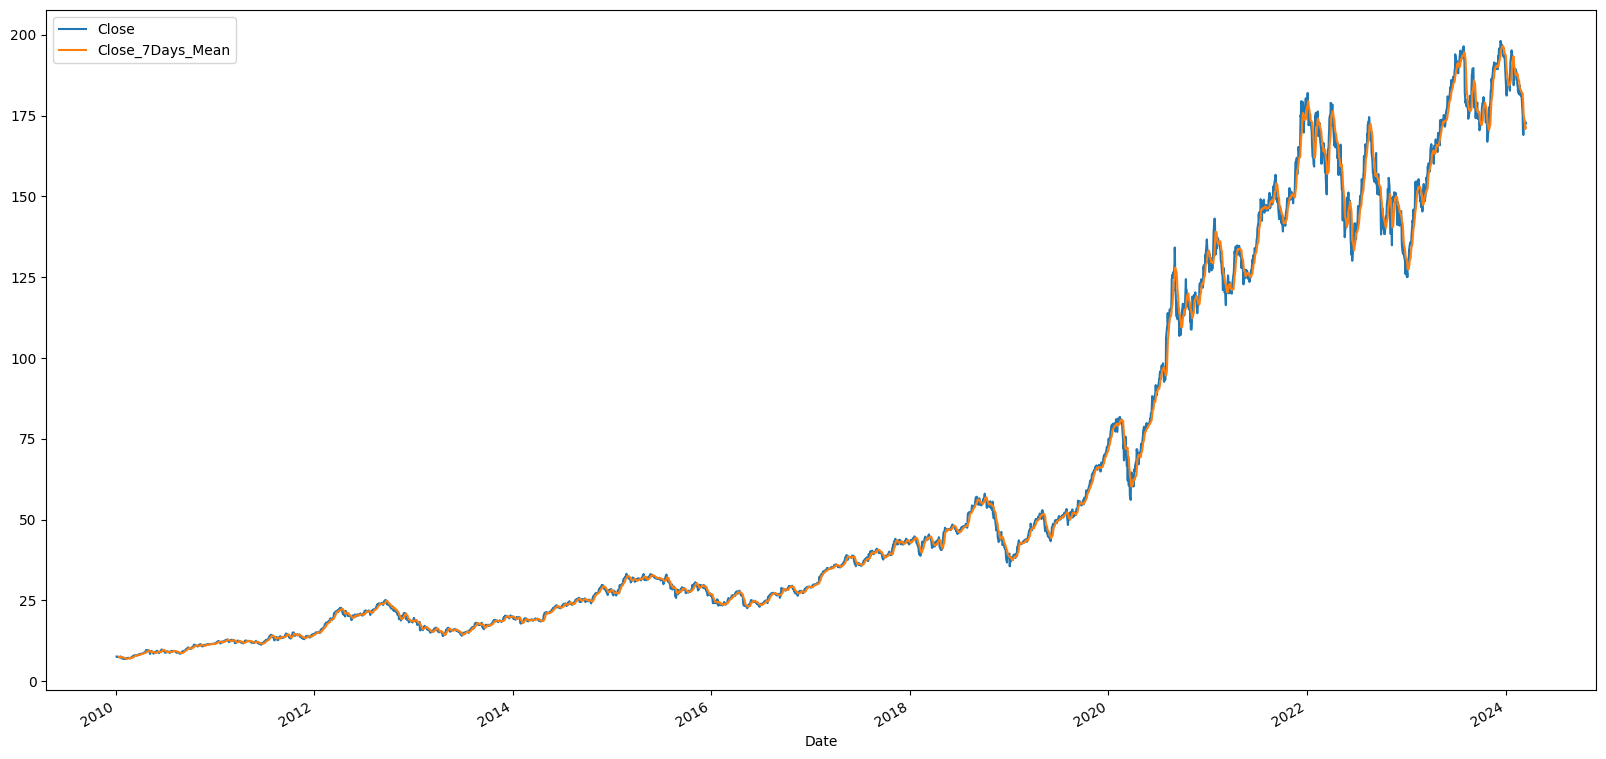

In [10]:
import FinanceDataReader as fdr

df_apple = fdr.DataReader('AAPL', start='2010')
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
plt.title('Close Price for Apple')
df_apple[['Close','Close_7Days_Mean']].plot(figsize=(20,10))

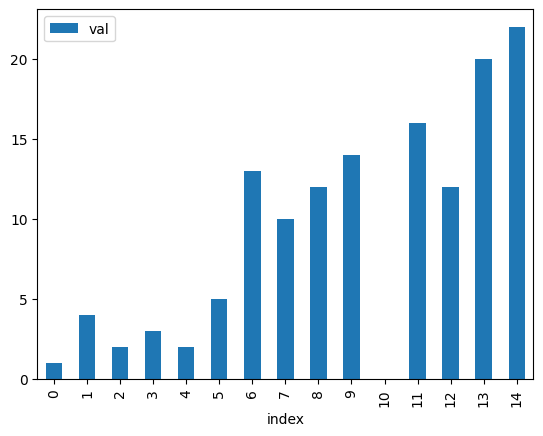

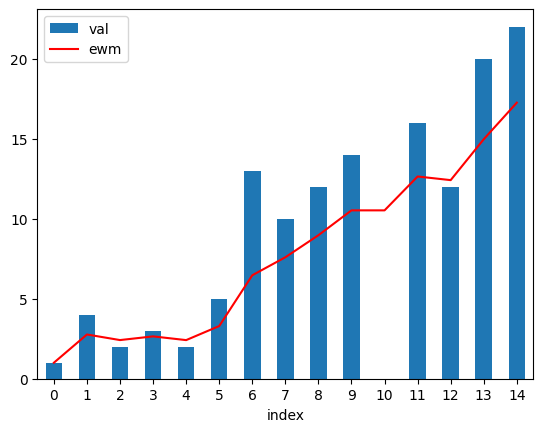

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {'val' : [1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
df.plot(kind='bar', x='index', y='val')

df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean())
ax = df.plot(kind='bar', x='index', y='val')
ax2 = df2.plot(kind='line', x='index', y='ewm', color='red', ax=ax)
plt.show()